In [1]:
from __future__ import division, print_function
import numpy as np
import codecs
import re
import json
import os
import copy

from collections import defaultdict

%load_ext autoreload
%autoreload 2

In [2]:
# the session logs from the U Malaga Experiments
DB_DIR = '/home/chris/Desktop/Dropbox'
# DB_DIR = '/media/1tb_drive/Dropbox'

# LOG_DIR = 'projects/malaga_lm_autocompleters_april_2015/experiment_results/21.4.15'
LOG_DIR = os.path.join(DB_DIR, 
                       'projects/handycat_malaga_lm_autocompleters_april_2015/experiment_results/23.4.15')

DATA_DIR = os.path.join(DB_DIR, 
                        'projects/handycat_malaga_lm_autocompleters_april_2015/experiment_data')

# session_logs_1_json = os.path.join(LOG_DIR, '21.4.15.malaga_experiments.session_logs.json')
session_logs_2_json = os.path.join(LOG_DIR, '23.4.15.malaga_experiments.session_logs.after-1015.json')

all_log_entries = []
# with codecs.open(session_logs_1_json, encoding='utf8') as json_logs:
#     all_log_entries.extend(json.loads(json_logs.read()))

with codecs.open(session_logs_2_json, encoding='utf8') as json_logs:
    all_log_entries.extend(json.loads(json_logs.read()))


In [3]:
len(all_log_entries)

940

In [4]:
all_log_entries[:3]

[{u'_id': {u'$oid': u'5538a1ff126968d806e7a921'},
  u'action': u'change-segment',
  u'data': {u'currentValue': u'Seg\xfan la madre de Alejandro, Alejandro ten\xeda una capacidad para absorbar todo lo que le\xeda.',
   u'segmentId': 0},
  u'project': {u'_id': u'5534c385231466450c450c1f',
   u'name': u'malaga_en_es_test'},
  u'time': 1429774846990.0,
  u'user': {u'_id': u'5534c364231466450c450c1e', u'name': u'anya@test.com'}},
 {u'_id': {u'$oid': u'5538a20b126968d806e7a923'},
  u'action': u'change-segment',
  u'data': {u'currentValue': u'Seg\xfan la madre de Alejandro, Alejandro ten\xeda una capacidad para absorbar todo lo que le\xeda.',
   u'segmentId': 0},
  u'project': {u'_id': u'5534c385231466450c450c1f',
   u'name': u'malaga_en_es_test'},
  u'time': 1429774858543.0,
  u'user': {u'_id': u'5534c364231466450c450c1e', u'name': u'anya@test.com'}},
 {u'_id': {u'$oid': u'5538a20b126968d806e7a922'},
  u'action': u'change-segment',
  u'data': {u'currentValue': u'Seg\xfan la madre de Alejandr

In [5]:
print(len(all_log_entries))

940


In [6]:
# exclude Chris's entries and those of other test users
bad_users = set(['chris', 'christ', 'anya', 'testchris'])
def exclude_users(entry):
    if entry['user']['name'] in bad_users:
        return False
    return True

good_log_entries = filter(exclude_users, all_log_entries)
print(len(good_log_entries))
all_users = set([entry['user']['name'] for entry in good_log_entries])
print('num users: {}'.format(len(all_users)))

907
num users: 16


In [7]:
# this assumes there was only one autocomplete in the UI
def get_autocomplete_type(config_obj):
    return config_obj['target']['widgets'].keys()[0]

# look at the number of 'segment-complete's we got for each autocomplete type

completed_segs_by_autocomplete = defaultdict(list)
for entry in good_log_entries:
        if entry['action'] == u'segment-complete':
            completed_segs_by_autocomplete[get_autocomplete_type(entry['data']['configuration'])].append(entry)

In [8]:
[(k,len(v)) for k,v in completed_segs_by_autocomplete.items()]

[(u'defaultLMAutocomplete', 240), (u'constrainedLMAutocomplete', 148)]

In [9]:
# Q: which projects used which autocomplete?
complete_actions = [a for a in good_log_entries if a['action'] == 'segment-complete']

In [10]:
len(complete_actions)

388

In [11]:
complete_actions[0]

{u'_id': {u'$oid': u'5538b279126968d806e7a92b'},
 u'action': u'segment-complete',
 u'data': {u'configuration': {u'target': {u'widgets': {u'constrainedLMAutocomplete': True}}},
  u'newValue': u'',
  u'previousValue': u'',
  u'segmentId': 0},
 u'project': {u'_id': u'5538b22f9325c3d806749c72',
  u'name': u'en-es-sentences_1'},
 u'time': 1429779071884.0,
 u'user': {u'name': u'carolinaurdiales'}}

In [12]:
set([(e['project']['name'], e['data']['configuration']['target']['widgets'].keys()[0]) for e in complete_actions])

{(u'en-es-sentences_1', u'constrainedLMAutocomplete'),
 (u'en-es-sentences_2', u'constrainedLMAutocomplete'),
 (u'en-es-sentences_3', u'defaultLMAutocomplete'),
 (u'en-es-sentences_4', u'defaultLMAutocomplete'),
 (u'en-es-sentences_5', u'defaultLMAutocomplete'),
 (u'en-es-sentences_6', u'constrainedLMAutocomplete'),
 (u'en-es-sentences_7', u'defaultLMAutocomplete'),
 (u'en-es-sentences_8', u'constrainedLMAutocomplete')}

In [13]:
# num instances per project per sentence
# projects 1 & 3 have the same segments
# projects 2 & 4 have the same segments

def get_project_name(entry):
    return entry['project']['name']

completed_segs_by_project = defaultdict(list)
for entry in good_log_entries:
        if entry['action'] == u'segment-complete':
            completed_segs_by_project[get_project_name(entry)].append(entry)




In [14]:
[(k,len(v)) for k,v in completed_segs_by_project.items()]

[(u'en-es-sentences_8', 26),
 (u'en-es-sentences_7', 113),
 (u'en-es-sentences_6', 16),
 (u'en-es-sentences_5', 42),
 (u'en-es-sentences_4', 45),
 (u'en-es-sentences_3', 40),
 (u'en-es-sentences_2', 60),
 (u'en-es-sentences_1', 46)]

In [15]:
from collections import Counter

In [16]:
sen_instances_per_project = defaultdict(Counter)
for project_name, entry_list in completed_segs_by_project.items():
    sen_instances_per_project[project_name].update([entry['data']['segmentId'] for entry in entry_list])

In [17]:
for project_name, instance_counter in sen_instances_per_project.items():
    print(project_name)
    print(instance_counter.items())

en-es-sentences_8
[(0, 4), (1, 4), (2, 4), (3, 3), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]
en-es-sentences_7
[(0, 7), (1, 7), (2, 7), (3, 7), (4, 9), (5, 7), (6, 8), (7, 8), (8, 7), (9, 8), (10, 7), (11, 8), (12, 8), (13, 8), (14, 7)]
en-es-sentences_6
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]
en-es-sentences_5
[(0, 4), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 2), (12, 2), (13, 2), (14, 2)]
en-es-sentences_4
[(0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (13, 3), (14, 3)]
en-es-sentences_3
[(0, 4), (1, 4), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2)]
en-es-sentences_2
[(0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4), (10, 4), (11, 4), (12, 4), (13, 4), (

In [18]:
# group and order actions by user
from blist import sortedlist
def time_sorted_entry_list():
    return sortedlist([], key=lambda entry: entry['time'])

sorted_actions_by_user = defaultdict(time_sorted_entry_list)

for entry in good_log_entries:
    sorted_actions_by_user[entry['user']['name']].add(entry)

In [19]:
import datetime

In [20]:
for user, entries in sorted_actions_by_user.items():
    print(user)
    print(len(entries))
    for e in entries: 
        dt = datetime.datetime.fromtimestamp(e['time']/1000).strftime("%Y-%m-%d %H:%M:%S")
        print('\t{}'.format((e['action'],dt, e['data']['segmentId'], get_project_name(e))))
        if e['action'] == 'segment-complete':
            print(e['data']['newValue'])
    


olakase
61
	(u'change-segment', '2015-04-23 09:51:55', 0, u'en-es-sentences_7')
	(u'segment-complete', '2015-04-23 09:53:07', 0, u'en-es-sentences_7')
Según la madre de Alejandro, este tenía la capacidad de absorber todo lo que leía.
	(u'change-segment', '2015-04-23 09:53:07', 1, u'en-es-sentences_7')
	(u'segment-complete', '2015-04-23 09:54:24', 1, u'en-es-sentences_7')
Las islas tienen un clima mediterráneo y las cuatro más grandes son destinos populares entre los turistas.
	(u'change-segment', '2015-04-23 09:54:24', 2, u'en-es-sentences_7')
	(u'segment-complete', '2015-04-23 09:56:00', 2, u'en-es-sentences_7')
Las islas tenían una población muy variada, de cuyos hábitos se contaban diversas historias un tanto raras.
	(u'change-segment', '2015-04-23 09:56:00', 3, u'en-es-sentences_7')
	(u'segment-complete', '2015-04-23 09:57:19', 3, u'en-es-sentences_7')
Durante siglos, los marineros y piratas de las islas Baleares habían sido jefes de la zona oeste del Mediterráneo.
	(u'change-segme

In [21]:
print(np.average([len(entries) for u, entries in sorted_actions_by_user.items()]))

56.6875


In [22]:
# working -- get (approximate) time per sentence
# this is really only possible when the user worked in order
# if the previous event was segment complete, sum the difference onto the total time for this segment
# ERROR -- we missed logging when they started the activity (activate-segment does not fire here)
# -- error is fixed for the second set of Malaga experiments

def rec_dd():
    return defaultdict(rec_dd)

segment_times_by_user_by_project = rec_dd()
# d['user']['project']['segId'] = total_time_spent_on_segment

for user, entries in sorted_actions_by_user.items():
    for idx,e in enumerate(entries): 
        action = e['action']
        segmentId = e['data']['segmentId']
        projectId = get_project_name(e)
#         print('{}, {}, {}, {}'.format(action, segmentId, projectId, idx))
#         if the previous entry was in the same project, and if it was the previous segment sum the time difference
#         with the current running total for the time spent on this segment
        if idx > 0 and action == 'segment-complete' and ((entries[idx - 1]['data']['segmentId'] == segmentId-1 
                       and entries[idx-1]['action'] == 'segment-complete')
                   or (entries[idx - 1]['data']['segmentId'] == segmentId 
                       and entries[idx-1]['action'] == 'activate-segment')
                   or (entries[idx - 1]['data']['segmentId'] == segmentId 
                       and entries[idx-1]['action'] == 'change-segment')) and get_project_name(entries[idx-1]) == get_project_name(e): 
            begin = datetime.datetime.fromtimestamp(entries[idx-1]['time']/1000)
            end = datetime.datetime.fromtimestamp(e['time']/1000)
            total_seconds = (end - begin).total_seconds()
            if total_seconds >= 10.0:
#                 print('passed')
#                 print((end - begin).total_seconds())
                if segmentId in segment_times_by_user_by_project[user][projectId]:
                    segment_times_by_user_by_project[user][projectId][segmentId] += total_seconds
                else:
                    segment_times_by_user_by_project[user][projectId][segmentId] = total_seconds
    
#         dt = datetime.datetime.fromtimestamp(e['time']/1000).strftime("%Y-%m-%d %H:%M:%S")
#         print('\t{}'.format((e['action'],dt, e['data']['segmentId'], get_project_name(e))))
#         if e['action'] == 'segment-complete':
#             print(e['data']['newValue'])
print(json.dumps(segment_times_by_user_by_project, indent=4))
print(len(segment_times_by_user_by_project))

{
    "olakase": {
        "en-es-sentences_7": {
            "0": 72.334, 
            "1": 76.256, 
            "2": 95.894, 
            "3": 79.254, 
            "4": 94.318, 
            "5": 60.056, 
            "6": 73.888, 
            "7": 119.855, 
            "8": 50.267, 
            "9": 64.409, 
            "10": 148.425, 
            "11": 90.197, 
            "12": 82.842, 
            "13": 61.211, 
            "14": 25.872
        }, 
        "en-es-sentences_8": {
            "0": 30.153, 
            "1": 45.554, 
            "2": 37.98, 
            "3": 56.696, 
            "4": 67.332, 
            "5": 84.342, 
            "6": 79.121, 
            "7": 63.618, 
            "8": 32.413, 
            "9": 36.671, 
            "10": 39.365, 
            "11": 54.965, 
            "12": 26.861, 
            "13": 38.591, 
            "14": 28.549
        }
    }, 
    "malaga": {
        "en-es-sentences_3": {
            "0": 54.883, 
            "1": 42.532, 
   

In [23]:
# get average time by user by project
average_time_by_user_by_project = defaultdict(rec_dd)
for user in segment_times_by_user_by_project.keys():
    for project_name in segment_times_by_user_by_project[user].keys():
        average_time_by_user_by_project[user][project_name] = np.average([v for k,v in segment_times_by_user_by_project[user][project_name].items()])

In [24]:
print(json.dumps(average_time_by_user_by_project, indent=4))
len(average_time_by_user_by_project.keys())

{
    "olakase": {
        "en-es-sentences_7": 79.671866666666702, 
        "en-es-sentences_8": 48.147399999999998
    }, 
    "malaga": {
        "en-es-sentences_3": 60.850266666666677, 
        "en-es-sentences_2": 63.282866666666671
    }, 
    "testes": {
        "en-es-sentences_7": 113.30349999999997, 
        "en-es-sentences_8": 62.034999999999997
    }, 
    "Pablo Garc\u00eda": {
        "en-es-sentences_7": 110.98659999999998
    }, 
    "rudevanu": {
        "en-es-sentences_2": 129.67659999999998
    }, 
    "Dai": {
        "en-es-sentences_4": 65.390533333333337, 
        "en-es-sentences_1": 70.067133333333331
    }, 
    "dyanna_31": {
        "en-es-sentences_3": 63.353333333333339, 
        "en-es-sentences_2": 62.302066666666668
    }, 
    "Laura": {
        "en-es-sentences_3": 73.228624999999994, 
        "en-es-sentences_2": 103.55893333333333
    }, 
    "carolinaurdiales": {
        "en-es-sentences_4": 74.691000000000017, 
        "en-es-sentences_1": 114.

15

In [25]:

# this map works for both U Malaga experiment sets
project_to_dataset_map = {
    "en-es-sentences_1": 'dataset_1',
    "en-es-sentences_3": 'dataset_1',
    "en-es-sentences_5": 'dataset_1',
    "en-es-sentences_8": 'dataset_1',
    "en-es-sentences_2": 'dataset_2',
    "en-es-sentences_4": 'dataset_2',
    "en-es-sentences_6": 'dataset_2',
    "en-es-sentences_7": 'dataset_2'
}

project_to_autocomplete_type_map = {
#      [(u'defaultLMAutocomplete', 240), (u'constrainedLMAutocomplete', 148)]/   
    "en-es-sentences_1": 'constrainedLMAutocomplete',
    "en-es-sentences_3": 'defaultLMAutocomplete',
    "en-es-sentences_5": 'defaultLMAutocomplete',
    "en-es-sentences_8": 'constrainedLMAutocomplete',
    "en-es-sentences_2": 'constrainedLMAutocomplete',
    "en-es-sentences_4": 'defaultLMAutocomplete',
    "en-es-sentences_6": 'constrainedLMAutocomplete',
    "en-es-sentences_7": 'defaultLMAutocomplete'
    
}

discard_projects = set(['en-es-sample_project'])

In [26]:
# get times by autocomplete type by sentences
# also store num instances per sentence per setting
time_by_sentence_by_autocomplete_type = defaultdict(rec_dd)
time_by_sentence_by_dataset = defaultdict(rec_dd)

for user in segment_times_by_user_by_project.keys():
    for project_name, segment_times in segment_times_by_user_by_project[user].items():
        if project_name in discard_projects:
            break
        dataset_name = project_to_dataset_map[project_name]
        autocomplete_type = project_to_autocomplete_type_map[project_name]
        for sen_id, sen_time in segment_times.items():
            if sen_id in time_by_sentence_by_autocomplete_type[dataset_name][autocomplete_type]:
                time_by_sentence_by_autocomplete_type[dataset_name][autocomplete_type][sen_id].append(sen_time)
            else:
                time_by_sentence_by_autocomplete_type[dataset_name][autocomplete_type][sen_id] = [sen_time]
            
            if sen_id in time_by_sentence_by_dataset[dataset_name]:
                time_by_sentence_by_dataset[dataset_name][sen_id].append(sen_time)
            else:
                time_by_sentence_by_dataset[dataset_name][sen_id] = [sen_time]
            
            
print(json.dumps(time_by_sentence_by_autocomplete_type, indent=4))

{
    "dataset_1": {
        "defaultLMAutocomplete": {
            "0": [
                54.883, 
                34.732, 
                66.818, 
                41.928, 
                163.156, 
                68.80199999999999
            ], 
            "1": [
                42.532, 
                56.992, 
                41.32, 
                57.755, 
                100.369, 
                44.63
            ], 
            "2": [
                38.872, 
                28.696, 
                25.576, 
                82.65, 
                77.376, 
                41.876
            ], 
            "3": [
                82.894, 
                103.462, 
                161.189, 
                72.204, 
                332.009, 
                279.026
            ], 
            "4": [
                37.526, 
                83.065, 
                80.127, 
                109.303, 
                108.008, 
                44.377
            ], 
            "

In [27]:
avg_time_per_sentence_per_autocomplete_type = defaultdict(rec_dd)
for dataset, autocomplete_map in time_by_sentence_by_autocomplete_type.items():
    for autocomplete_type, sen_id_map in autocomplete_map.items():
        for sen_id, times in sen_id_map.items():
            # TODO: some times may be radically different from others -- delete these?
            # WORKING: remove the max value
            # try removing the max 2 values
            times_copy = list(times)
            times_copy.remove(max(times_copy))
            avg_time = np.average(times_copy)
            num_instances = len(times)
            avg_time_per_sentence_per_autocomplete_type[dataset][sen_id][autocomplete_type] = {'avg_time': avg_time, 'num_instances': num_instances} 
            
print(json.dumps(avg_time_per_sentence_per_autocomplete_type, indent=2))

{
  "dataset_1": {
    "0": {
      "defaultLMAutocomplete": {
        "num_instances": 6, 
        "avg_time": 53.432600000000001
      }, 
      "constrainedLMAutocomplete": {
        "num_instances": 7, 
        "avg_time": 53.072333333333326
      }
    }, 
    "1": {
      "defaultLMAutocomplete": {
        "num_instances": 6, 
        "avg_time": 48.645799999999994
      }, 
      "constrainedLMAutocomplete": {
        "num_instances": 7, 
        "avg_time": 67.04283333333332
      }
    }, 
    "2": {
      "defaultLMAutocomplete": {
        "num_instances": 6, 
        "avg_time": 42.479200000000006
      }, 
      "constrainedLMAutocomplete": {
        "num_instances": 7, 
        "avg_time": 35.133166666666661
      }
    }, 
    "3": {
      "defaultLMAutocomplete": {
        "num_instances": 6, 
        "avg_time": 139.755
      }, 
      "constrainedLMAutocomplete": {
        "num_instances": 6, 
        "avg_time": 100.47160000000001
      }
    }, 
    "4": {
      "def

In [28]:
# the average time for each sentence, regardless of autocomplete type
# REMOVE THE MAX VALUE FROM EACH TIME LIST
avg_time_per_sentence = defaultdict(rec_dd)
for dataset, sen_map in time_by_sentence_by_dataset.items():
    for sen_id, times in sen_map.items():
        times_copy = list(times)
        times_copy.remove(max(times_copy))
        avg_time_per_sentence[dataset][sen_id] = np.average(times)
print(json.dumps(avg_time_per_sentence, indent=4))

{
    "dataset_1": {
        "0": 67.093230769230772, 
        "1": 64.386461538461532, 
        "2": 42.695384615384611, 
        "3": 143.95625000000001, 
        "4": 75.488500000000002, 
        "5": 95.185000000000002, 
        "6": 91.127500000000012, 
        "7": 83.012500000000003, 
        "8": 71.931624999999997, 
        "9": 89.271888888888881, 
        "10": 71.681111111111093, 
        "11": 99.786625000000001, 
        "12": 40.646000000000001, 
        "13": 57.688000000000002, 
        "14": 47.578374999999994
    }, 
    "dataset_2": {
        "0": 68.658090909090916, 
        "1": 83.267499999999998, 
        "2": 90.534416666666672, 
        "3": 97.526833333333329, 
        "4": 109.69183333333335, 
        "5": 74.129333333333349, 
        "6": 68.305538461538461, 
        "7": 113.14253846153846, 
        "8": 85.504461538461541, 
        "9": 90.610307692307714, 
        "10": 138.03176923076924, 
        "11": 74.618250000000003, 
        "12": 94.777166666666

In [29]:
constrained_autocomplete_speed_diff_by_sentence = defaultdict(rec_dd)
all_diffs = []
for dataset, sen_map in avg_time_per_sentence_per_autocomplete_type.items():
    for sen_id, autocomplete_map in sen_map.items():
#         if negative we improved, if positive we were worse
        speed_diff = autocomplete_map["constrainedLMAutocomplete"]['avg_time'] - autocomplete_map["defaultLMAutocomplete"]['avg_time']
        constrained_autocomplete_speed_diff_by_sentence[dataset][sen_id] = speed_diff 
        all_diffs.append(speed_diff)

In [30]:
print(json.dumps(constrained_autocomplete_speed_diff_by_sentence, indent=4))

{
    "dataset_1": {
        "0": -0.36026666666667495, 
        "1": 18.397033333333326, 
        "2": -7.3460333333333452, 
        "3": -39.283399999999986, 
        "4": 1.4374000000000109, 
        "5": -8.963933333333344, 
        "6": 21.42799999999999, 
        "7": -5.4856666666666598, 
        "8": -4.3980000000000032, 
        "9": 3.5206666666666635, 
        "10": -5.7141666666666566, 
        "11": -40.899666666666661, 
        "12": -8.2119999999999997, 
        "13": -11.585333333333331, 
        "14": 0.20199999999999818
    }, 
    "dataset_2": {
        "0": 2.1286500000000004, 
        "1": -9.9124166666666724, 
        "2": -7.49166666666666, 
        "3": -6.0958333333333314, 
        "4": -7.8733333333333348, 
        "5": 7.1440000000000126, 
        "6": -12.724714285714285, 
        "7": -3.3649642857142936, 
        "8": -23.623357142857138, 
        "9": -24.283964285714276, 
        "10": -24.974249999999998, 
        "11": 5.7346666666666692, 
        "12"

In [31]:
# now measure the correlation between avg time and speed diff
from scipy.stats import pearsonr

diff_values = constrained_autocomplete_speed_diff_by_sentence['dataset_1'].values() + constrained_autocomplete_speed_diff_by_sentence['dataset_2'].values()
avg_times = avg_time_per_sentence['dataset_1'].values() + avg_time_per_sentence['dataset_2'].values()

pearsonr(avg_times, diff_values)

(-0.46997089993733443, 0.0087792302922951766)

In [32]:
# good correlation between average time and autocomplete diff
# (-0.46997089993733443, 0.0087792302922951766)

# Conclusion: sentences that take longer benefit more from good autocompletion(?)
# -- this makes sense, but is obvious

In [33]:
import os

In [34]:
EXPERIMENT_DATA_HOME= DATA_DIR
dataset_1_file = os.path.join(EXPERIMENT_DATA_HOME, 'sentences_set_1.txt')
dataset_2_file = os.path.join(EXPERIMENT_DATA_HOME, 'sentences_set_2.txt')

def get_dataset_sens(filename):
    with codecs.open(filename, encoding='utf8') as sens_in:
        out = []
        for l in sens_in:
            l = l.strip()
            out.append(l)
    return out

dataset_1_sens = get_dataset_sens(dataset_1_file)
dataset_2_sens = get_dataset_sens(dataset_2_file)
dataset_sen_map = {
    "dataset_1": dataset_1_sens,
    "dataset_2": dataset_2_sens
}

In [56]:
from nltk.tokenize import wordpunct_tokenize

diffs_with_sentences = defaultdict(rec_dd)
for dataset, sen_map in constrained_autocomplete_speed_diff_by_sentence.items():
    dataset_sens = dataset_sen_map[dataset]
    for sen_id, diff in sen_map.items():
        sentence = dataset_sens[int(sen_id)]
#         length in chars or words?
#         sentence_length = len(wordpunct_tokenize(sentence))
        sentence_length = len(sentence)
        diffs_with_sentences[dataset][sen_id] = {"diff": diff, "sentence": sentence, 'length': sentence_length}

        
print(json.dumps(diffs_with_sentences, indent=4))    

{
    "dataset_1": {
        "0": {
            "diff": -0.36026666666667495, 
            "length": 93, 
            "sentence": "From the age of 15, Alejandro would dedicate his time to going to the cinema to watch movies."
        }, 
        "1": {
            "diff": 18.397033333333326, 
            "length": 94, 
            "sentence": "He did not want to start his university studies in cinema before ever having touched a camera."
        }, 
        "2": {
            "diff": -7.3460333333333452, 
            "length": 74, 
            "sentence": "The islands' culture and cuisine are similar to that of the rest of Spain."
        }, 
        "3": {
            "diff": -39.283399999999986, 
            "length": 93, 
            "sentence": "Notwithstanding their celebrity in war, the people were generally very quiet and inoffensive."
        }, 
        "4": {
            "diff": 1.4374000000000109, 
            "length": 97, 
            "sentence": "This was a turning point 

In [57]:
avg_time_per_autocomplete_type_with_sentence_length = defaultdict(rec_dd)

for dataset_name, instance_dict in avg_time_per_sentence_per_autocomplete_type.items():
    for instance_id, autocomplete_type_dict in instance_dict.items():
        type_dict_w_len = copy.deepcopy(autocomplete_type_dict)
        type_dict_w_len['length'] = diffs_with_sentences[dataset_name][instance_id]['length']
        type_dict_w_len['sentence'] = diffs_with_sentences[dataset_name][instance_id]['sentence']

#         print(json.dumps(type_dict_w_len, indent=2))
#         print(dataset_name)
#         print(instance_id)
        avg_time_per_autocomplete_type_with_sentence_length[dataset_name][instance_id] = type_dict_w_len

print(json.dumps(avg_time_per_autocomplete_type_with_sentence_length, indent=2))

{
  "length": 93, 
  "defaultLMAutocomplete": {
    "avg_time": 53.432600000000001, 
    "num_instances": 6
  }, 
  "constrainedLMAutocomplete": {
    "avg_time": 53.072333333333326, 
    "num_instances": 7
  }, 
  "sentence": "From the age of 15, Alejandro would dedicate his time to going to the cinema to watch movies."
}
dataset_1
0
{
  "length": 94, 
  "defaultLMAutocomplete": {
    "avg_time": 48.645799999999994, 
    "num_instances": 6
  }, 
  "constrainedLMAutocomplete": {
    "avg_time": 67.04283333333332, 
    "num_instances": 7
  }, 
  "sentence": "He did not want to start his university studies in cinema before ever having touched a camera."
}
dataset_1
1
{
  "length": 74, 
  "defaultLMAutocomplete": {
    "avg_time": 42.479200000000006, 
    "num_instances": 6
  }, 
  "constrainedLMAutocomplete": {
    "avg_time": 35.133166666666661, 
    "num_instances": 7
  }, 
  "sentence": "The islands' culture and cuisine are similar to that of the rest of Spain."
}
dataset_1
2
{
  "len

In [ ]:
# Paired dependent t-test over datasets
# dataset: (avg_time_with_default, avg_time_with_pt_constrained)

In [96]:
# DATASET = 'dataset_2'

# condition, category, value
# for us this is: autocomplete type, sen_id, avg_time
dpoints = []
sentence_lens = []
categories = []
sentences = []
sentence_ids = []
sentence_diffs = []
for dataset in avg_time_per_autocomplete_type_with_sentence_length.keys():
    for sen_id, lm_type_dict in avg_time_per_autocomplete_type_with_sentence_length[dataset].items():
        sentence_lens.append(lm_type_dict['length'])
        sen_id_str = '{}-sen_{}'.format(dataset, sen_id)
        sentence_ids.append(sen_id_str)
        categories.append(sen_id_str)
        sentences.append(lm_type_dict['sentence'])
        for field_name, value_dict in lm_type_dict.items():
            if 'Autocomplete' in field_name:
                dpoints.append([field_name, sen_id_str, value_dict['avg_time']])
        diff = diffs_with_sentences[dataset][sen_id]['diff']
        dpoints.append(['diff', sen_id_str, diff])
        sentence_diffs.append(diff)

dpoints = np.array(dpoints)
        

In [97]:
categories

['dataset_1-sen_0',
 'dataset_1-sen_1',
 'dataset_1-sen_2',
 'dataset_1-sen_3',
 'dataset_1-sen_4',
 'dataset_1-sen_5',
 'dataset_1-sen_6',
 'dataset_1-sen_7',
 'dataset_1-sen_8',
 'dataset_1-sen_9',
 'dataset_1-sen_10',
 'dataset_1-sen_11',
 'dataset_1-sen_12',
 'dataset_1-sen_13',
 'dataset_1-sen_14',
 'dataset_2-sen_0',
 'dataset_2-sen_1',
 'dataset_2-sen_2',
 'dataset_2-sen_3',
 'dataset_2-sen_4',
 'dataset_2-sen_5',
 'dataset_2-sen_6',
 'dataset_2-sen_7',
 'dataset_2-sen_8',
 'dataset_2-sen_9',
 'dataset_2-sen_10',
 'dataset_2-sen_11',
 'dataset_2-sen_12',
 'dataset_2-sen_13',
 'dataset_2-sen_14']

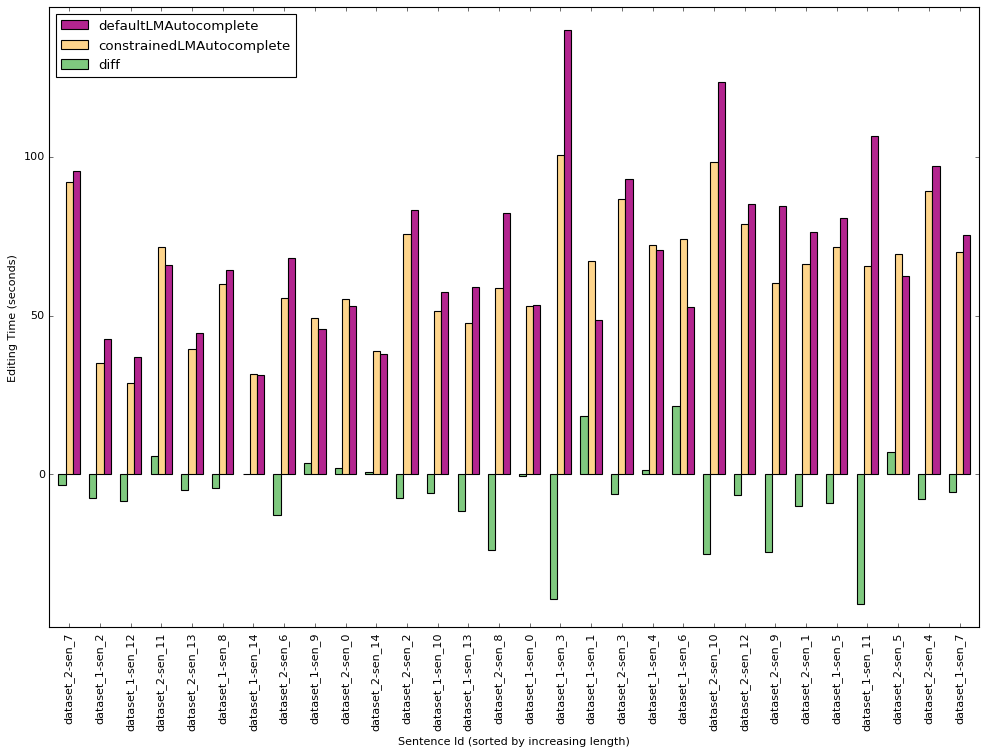

In [98]:
%matplotlib inline

# Now make bar chart with X axis sorted by sentence length
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import operator as o

import numpy as np
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)

# print(
#     json.dumps(
#       sorted(avg_time_per_autocomplete_type_with_sentence_length['dataset_1'].items(), key=lambda x: x[1]['length']),
#       indent=2))

fig = plt.figure()
ax = fig.add_subplot(111)
# fig.tight_layout()
plt.autoscale(tight=True)
plt.margins(x=0.01, y=0.04)

def barplot(ax, dpoints, cats, lens):
    '''
    Create a barchart for data across different categories with
    multiple conditions for each category.
    
    @param ax: The plotting axes from matplotlib.
    @param dpoints: The data set as an (n, 3) numpy array
    '''
    
    # sort categories by sentence len 
    # Aggregate the conditions and the categories according to their
    # mean values
    conditions = [(c, np.mean(dpoints[dpoints[:,0] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,0])]
#     categories = [(c, np.mean(dpoints[dpoints[:,1] == c][:,2].astype(float))) 
#                   for c in np.unique(dpoints[:,1])]
    
    # sort the conditions, categories and data so that the bars in
    # the plot will be ordered by category and condition
    
    # sort conditions by sentence length
    conditions = [c[0] for c in sorted(conditions, key=o.itemgetter(1))]
    x_axis_cats = [c[0] for c in sorted(zip(cats, lens), key=lambda x: x[1])]
#     categories = [c[0][0] for c in sorted(zip(categories, sentence_lens), key=o.itemgetter(1))]
    
    dpoints = np.array(sorted(dpoints, key=lambda x: x_axis_cats.index(x[1])))

    # the space between each set of bars
    space = 0.3
    n = len(conditions)
    width = (1 - space) / (len(conditions))
    
    # Create a set of bars at each position
    for i,cond in enumerate(conditions):
        indeces = range(1, len(x_axis_cats)+1)
        vals = dpoints[dpoints[:,0] == cond][:,2].astype(np.float)
        pos = [j - (1 - space) / 2. + i * width for j in indeces]
        ax.bar(pos, vals, width=width, label=cond, 
               color=cm.Accent(float(i) / n))
    
    # Set the x-axis tick labels to be equal to the categories
    ax.set_xticks(indeces)
    ax.set_xticklabels(x_axis_cats)
#     ax.set_xticklabels(sorted(lens))

    plt.setp(plt.xticks()[1], rotation=90)
    
    # Add the axis labels
    ax.set_ylabel("Editing Time (seconds)")
    ax.set_xlabel("Sentence Id (sorted by increasing length)")
    
    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper left')

    return x_axis_cats

        
x_axis_labels = barplot(ax, dpoints, categories, sentence_lens)
# savefig('barchart_3.png')
# width = 9
# height = 6
# plt.figure(figsize=(width, height))
plt.show()

In [99]:
sen_by_id = {k:v for k, v in zip(sentence_ids, sentences)}

In [100]:
# What is correlated with overall editing time?
# sentence length in characters doesn't seem to be
sens_by_len = [(sen_id, sen_by_id[sen_id]) for sen_id in x_axis_labels]
sens_by_len

[('dataset_2-sen_7',
  u'The Civil War is often called the "dress rehearsal" for World War II.'),
 ('dataset_1-sen_2',
  u"The islands' culture and cuisine are similar to that of the rest of Spain."),
 ('dataset_1-sen_12',
  u'Orson Welles said he was inspired by his frequent trips to Spain and Ronda.'),
 ('dataset_2-sen_11',
  u'You can make a seafood broth from shrimp heads, onions, garlic and bay leaves.'),
 ('dataset_2-sen_13',
  u'Ronda is situated in a very mountainous area about 750 m above mean sea level.'),
 ('dataset_1-sen_8',
  u'The Labour Party was split, with its Catholic element favouring the Nationalists.'),
 ('dataset_1-sen_14',
  u'Eduardo Noriega is the youngest of seven siblings and the only one who became an actor.'),
 ('dataset_2-sen_6',
  u'In October 1931, Republican Manuel Aza\xf1a became prime minister of a minority government.'),
 ('dataset_1-sen_9',
  u'In 1922, Mir\xf3 explored abstracted, strongly coloured surrealism in at least one painting.'),
 ('dataset

In [107]:
# idea: regression plot diff by sentence len
from scipy.stats import linregress

sorted_lens, sorted_diffs = zip(*sorted(zip(sentence_lens, sentence_diffs), key=lambda x: x[0]))

x = np.array(sorted_lens, dtype='float')
y = np.array(sorted_diffs, dtype='float')
regression_results = linregress(x,y)
print(regression_results)

LinregressResult(slope=-0.22643590698865629, intercept=14.273503708600966, rvalue=-0.18781767235104929, pvalue=0.32027681386465157, stderr=0.22378526398978676)


In [111]:
# idea: remove points with very high residuals
preds_from_len = (regression_results.slope * x) + regression_results.intercept
residuals = np.abs(y - preds_from_len)

In [112]:
indices_to_keep = [idx for idx, residual in enumerate(residuals) if residual < 10.]

In [113]:
filtered_x = x[indices_to_keep]
filtered_y = y[indices_to_keep]
filtered_regression_results = linregress(filtered_x, filtered_y)
print(filtered_regression_results)

LinregressResult(slope=-0.10395495601077541, intercept=4.9884222202738746, rvalue=-0.24304132748123647, pvalue=0.27577126526899137, stderr=0.092774568054773243)


In [ ]:
# CONCLUSION: length and autocomplete benefit are not well correlated

In [115]:
from scipy.stats import ttest_rel

# points by autocomplete type
default_autocomplete_dpoints = []
constrained_autocomplete_dpoints = [] 
for dataset in avg_time_per_autocomplete_type_with_sentence_length.keys():
    for sen_id, lm_type_dict in avg_time_per_autocomplete_type_with_sentence_length[dataset].items():
        default_autocomplete_dpoints.append(lm_type_dict['defaultLMAutocomplete']['avg_time'])
        constrained_autocomplete_dpoints.append(lm_type_dict['constrainedLMAutocomplete']['avg_time'])
        
# paired t-test
ttest_rel(default_autocomplete_dpoints, constrained_autocomplete_dpoints)

Ttest_relResult(statistic=2.7146187396598407, pvalue=0.011056313724068867)

/home/chris/programs/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


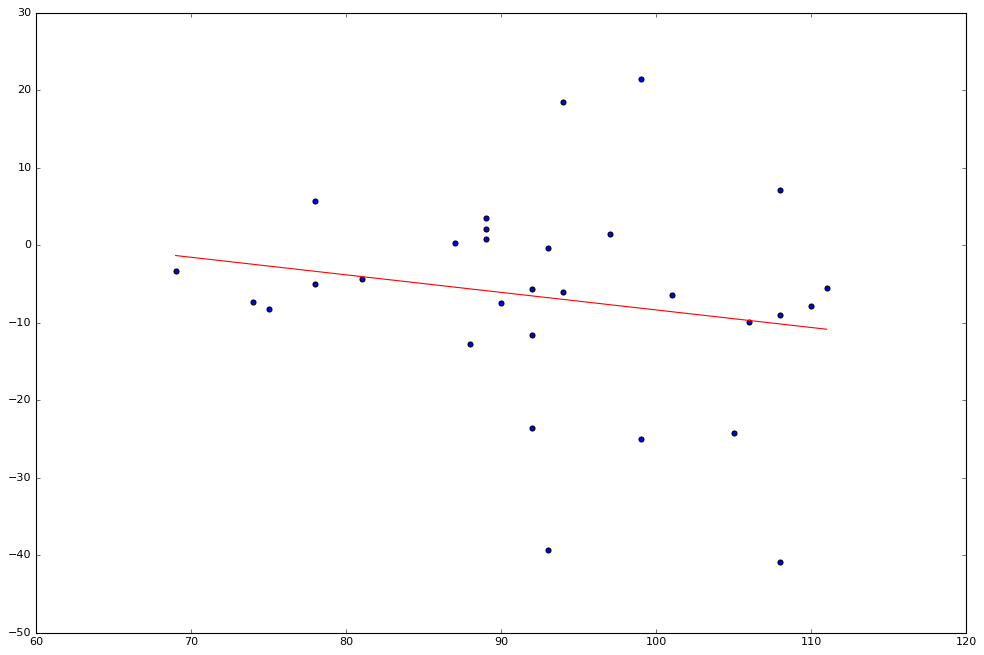

In [105]:
fig, ax = plt.subplots()
# fit = np.polyfit(x, y, deg=1)
ax.plot(x, regression_results.slope * x + regression_results.intercept, color='red')
ax.scatter(x, y)

fig.show()

In [54]:
np.average(all_diffs)

-6.7774877777777771

In [ ]:
print(json.dumps(avg_time_per_sentence_per_autocomplete_type, indent=4))

In [ ]:
# Checking Phrase Table coverage of sentences

from lm_autocomplete.phrase_table.parsers.moses_triple_pipe_parser import MosesTriplePipeParser
from lm_autocomplete.phrase_table.in_memory_phrase_table import InMemoryPhraseTable

# TODO: how do speed improvements correlate with phrase table coverage of the sentence unigrams? 
# -- how much could we help them with the phrase table?
phrase_table_file = os.path.join(DB_DIR, 'data/handycat_data/lm_autocomplete/test_data/phrase_tables/wmt-phrase-table.en-es.input-filtered')
# /home/ubuntu/handycat_builds/microservices
parser = MosesTriplePipeParser()
phrase_objects = parser.parse(phrase_table_file)

pt_cutoff = 10
max_source_len = 5
en_es_phrase_table = InMemoryPhraseTable(phrase_objects, cutoff=pt_cutoff, max_source_len=max_source_len, max_entries=10)
# de_en_phrase_table = InMemoryPhraseTable(phrase_objects, cutoff=pt_cutoff, max_source_len=max_source_len, max_entries=5)

# WORKING - test usage of the lm autocomplete lib
from lm_autocomplete import extract_phrases
from nltk.tokenize import wordpunct_tokenize

In [ ]:
diffs_sentences_coverages = defaultdict(rec_dd)
for dataset, sen_map in diffs_with_sentences.items():
    # get the unigram coverage for each sentence
    for sen_id, sen_data in sen_map.items():
        tokens = wordpunct_tokenize(sen_data['sentence'])
        
        # ask the phrase table for matches
        phrases = extract_phrases(tokens, max_len=2)
        phrase_denom = len(phrases)
#         assert len(tokens) == len(phrases)
        mapped_unigrams = [en_es_phrase_table.get_target_phrases(p) for p in phrases]
        phrases_covered = sum(1 for m in mapped_unigrams if len(m) > 0)
        coverage = phrases_covered / float(phrase_denom)
        diffs_sentences_coverages[dataset][sen_id] = {"diff": sen_data["diff"], "sentence": sen_data["sentence"], "pt_coverage": coverage}
print(json.dumps(diffs_sentences_coverages, indent=4))

In [ ]:
# get average time by project
all_project_times = defaultdict(list)
for user_name, project_times in average_time_by_user_by_project.items():
    for project_name, project_time in project_times.items():
        all_project_times[project_name].append(project_time)
        
avg_project_times = {}
for project_name, time_list in all_project_times.items():
    avg_project_times[project_name] = np.average(time_list)

In [ ]:
print(json.dumps(avg_project_times, indent=4))

In [ ]:
# get average time by dataset
dataset_times = defaultdict(list)
for project_name, avg_time in avg_project_times.items():
    dataset_times[project_to_dataset_map[project_name]].append(avg_time)

dataset_time_avgs = {dataset_name: np.average(times) for dataset_name, times in dataset_times.items()}

autocomplete_times = defaultdict(list)
for project_name, avg_time in avg_project_times.items():
    autocomplete_times[project_to_autocomplete_type_map[project_name]].append(avg_time)

autocomplete_time_avgs = {autocomplete_name: np.average(times) for autocomplete_name, times in autocomplete_times.items()}    

print(json.dumps(dataset_time_avgs, indent=4))
print(json.dumps(autocomplete_time_avgs, indent=4))

In [ ]:
82.75 / 15

In [ ]:
82.75 - 73.246

In [ ]:
# get average time by autocomplete

In [ ]:
# PROBLEM -- did the users just get better as they translated more?
# -- we can't test this because we put the default last both times
# we really need 3 activities to get them more familiar with the interface first

# TO TEST -- for each sentence, what is its average 'first view' score, and what is its average 'second view' score?
# only consider cases where we have a minimum number of measurements for the sentence
